In [1]:
import torch

In [2]:
x = torch.arange(4.0)
x.requires_grad_(True)
x, x.grad

(tensor([0., 1., 2., 3.], requires_grad=True), None)

In [3]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [5]:
x.grad == 4 * x

tensor([True, True, True, True])

In [6]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [7]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [8]:
x.grad.zero_()
y.sum().backward(retain_graph=True)
x.grad, 2 * x, x.grad == 2 * x

(tensor([0., 2., 4., 6.]),
 tensor([0., 2., 4., 6.], grad_fn=<MulBackward0>),
 tensor([True, True, True, True]))

In [9]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c


a = torch.randn(size=([4]), requires_grad=True)
d = f(a)
d.backward(torch.tensor([1, 1, 1, 1]))

a, d, a.grad, d / a, a.grad == d / a

(tensor([-1.1881, -0.3814,  0.2528, -1.8074], requires_grad=True),
 tensor([-60830.1445, -19527.9102,  12944.1973, -92539.1719],
        grad_fn=<MulBackward0>),
 tensor([51200., 51200., 51200., 51200.]),
 tensor([51200., 51200., 51200., 51200.], grad_fn=<DivBackward0>),
 tensor([True, True, True, True]))

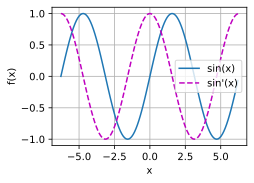

In [10]:
import math
import numpy as np
from d2l import torch as d2l


def f(x):
    return torch.sin(x)


x = np.arange(-torch.pi * 2, torch.pi * 2, 0.1)
x = torch.tensor(x, requires_grad=True)
x_d = x.detach()
y = f(x)
y_d = f(x_d)
y.sum().backward()

d2l.plot(x_d, [y_d, x.grad], 'x', 'f(x)', legend=['sin(x)', 'sin\'(x)'])